In [1]:
import pandas as pd
import numpy as np
from querys import get_usd, get_usd_of, get_usd_var, get_milestones, get_inflacion
from funciones import cambiar_rango_temporal, top_volatilidad, max_var_semanal, event_dict, plot_events
from regresión_linear import prediccion_linear_dolar

# Informe sobre dólar en Argentina.

In [2]:
#Carga de datos
#usd = pd.read_csv('usd_blue.csv', index_col=0)
usd = get_usd()
usd_off = get_usd_of()
usd_var = get_usd_var()

In [3]:
usd_full = pd.merge(usd, pd.merge(usd_off, usd_var,how='right', on='fecha'), how='right',on='fecha')

## 1) Dólar oficial vs Dólar Blue (365 días): 

In [4]:
usd_full = cambiar_rango_temporal(usd_full,1);

f:\Henry\LABS\TII_1\funciones.py:29: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = df['fecha'].between(rango, datetime.now(), inclusive=True)


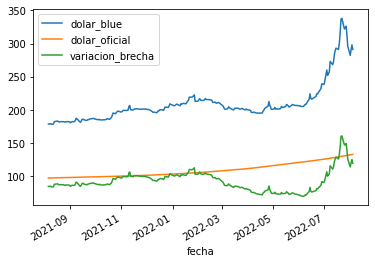

In [5]:
usd_full.plot(x='fecha');

### a) Día con mayor variación en la brecha

In [6]:
max_var = usd_full['variacion_brecha'].nlargest(1)
usd_full.loc[max_var.index[0]]

fecha               2022-07-22 00:00:00
dolar_blue                        338.0
dolar_oficial                    129.76
variacion_brecha               160.4809
Name: 5000, dtype: object

El día con mayor variación en la brecha corresponde a la fecha 2022/07/22, con una diferencia del %160

### b) Top 5 días con mayor volatilidad

Los 5 días con mayor volatilidad en el último año, para el dolar blue, fueron los siguientes:

In [7]:
top_volatilidad(usd_full,5,'blue')[['fecha','porcentaje_volatilidad']]

,fecha,porcentaje_volatilidad
4986,2022-07-04,8.79
4999,2022-07-21,6.31
4990,2022-07-08,6.23
5005,2022-07-29,5.73
4998,2022-07-20,5.32


Los 5 días con mayor volatilidad en el último año, para el dolar oficial, fueron los siguientes:

In [8]:
top_volatilidad(usd_full,5,'oficial')[['fecha','porcentaje_volatilidad']]

,fecha,porcentaje_volatilidad
4935,2022-04-18,0.66
4977,2022-06-21,0.64
5006,2022-08-01,0.54
4996,2022-07-18,0.52
5001,2022-07-25,0.49


### b') Top 5 días con mayor variación en la brecha

Los 5 días con mayor variación en le brecha cambiaria en el último año fueron los siguientes:

In [9]:
max_var = usd_full['variacion_brecha'].nlargest(5)
max_var
for i in range(5):
    fecha = str(usd_full.loc[max_var.index[i]]['fecha'].date())
    var = usd_full.loc[max_var.index[i]]['variacion_brecha']
    print(f'Día: {fecha} Variación: %{var}')

Día: 2022-07-22 Variación: %160.4809
Día: 2022-07-21 Variación: %160.0108
Día: 2022-07-27 Variación: %149.0641
Día: 2022-07-26 Variación: %147.2822
Día: 2022-07-25 Variación: %146.9325


### c) Semana con mayor variación en la brecha

In [10]:
semana = max_var_semanal(usd_full)
print(f'La semana con mayor variación en la brecha cambiaria fue la del {semana[0]} al {semana[1]}.')

La semana con mayor variación en la brecha cambiaria fue la del 2022-07-18 al 2022-07-22.


### d) Dia de la semana donde hay mas variación en la brecha

In [11]:
dia = []
for i in usd_full['fecha']:
    temp = pd.Timestamp(i)
    dia.append(temp.day_name())
usd_full['dia'] = dia
mayor_variacion = usd_full.groupby(['dia']).mean()['variacion_brecha'].nlargest(1)
mayor_variacion

dia
Wednesday    93.742204
Name: variacion_brecha, dtype: float64

El día de la semana con mayor variación en la brecha en promedio es el día Miércoles, con un porcentaje de variación media del $93.74 . El valor, sin embargo, es muy similar al de los demás días, por lo que no sería trascendente para tomar decisiones.

## 2) Sucesos importantes y su relación con el dolar: 

In [12]:
milestones = get_milestones()
usd = get_usd()
usd_off = get_usd_of()
usd_full_new = pd.merge(usd, usd_off,how='right',on='fecha')
df = pd.merge(usd_full_new, milestones, how = 'left', on='fecha')

In [13]:
# Separé el dataframe para poder graficar
regs = len(df)//4
df1 = df.iloc[:regs]
df2 = df.iloc[regs:regs*2]
df3 = df.iloc[regs*2:regs*3]
df4 = df.iloc[regs*3:]

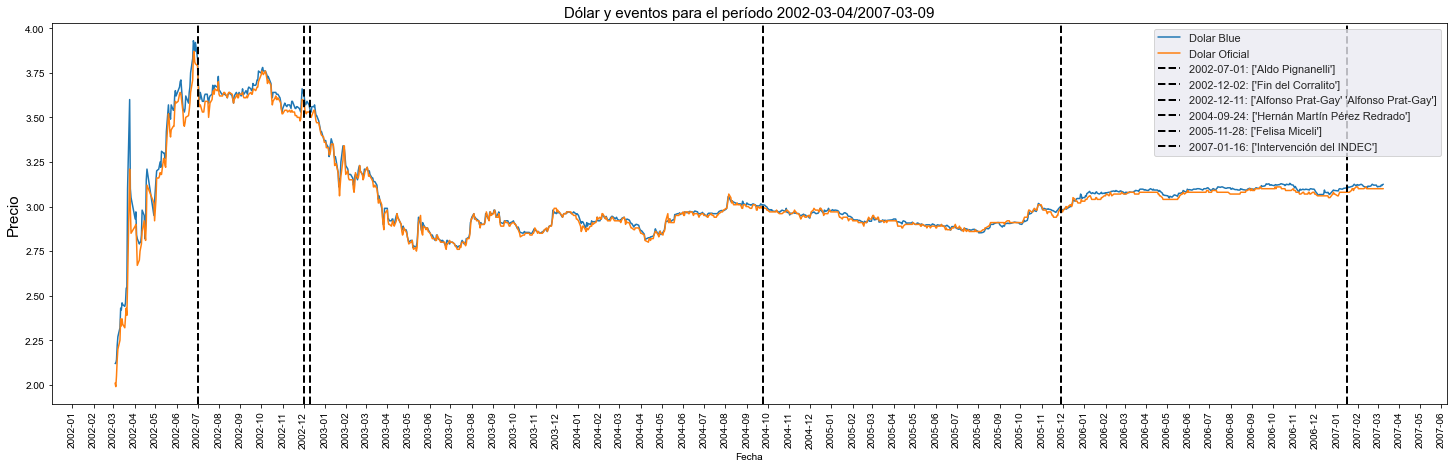

In [14]:
events = event_dict(df1)
plot_events(df1,events)

Evento destacado: Fin del corralito(2002-12-02) y posterior caída en la cotización del dolar en relación al peso.

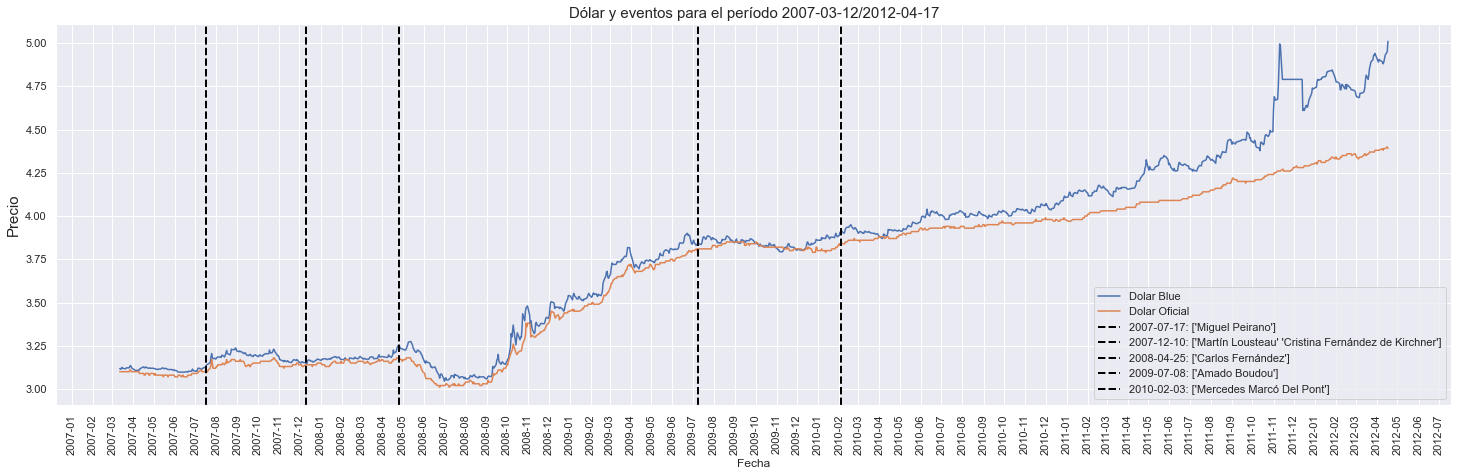

In [15]:
events = event_dict(df2)
plot_events(df2,events)

Evento destacado: Comienzo del gobierno de Cristina Fernández de Kirchner(2007-12-10) y posterior tendencia alcista del dólar.

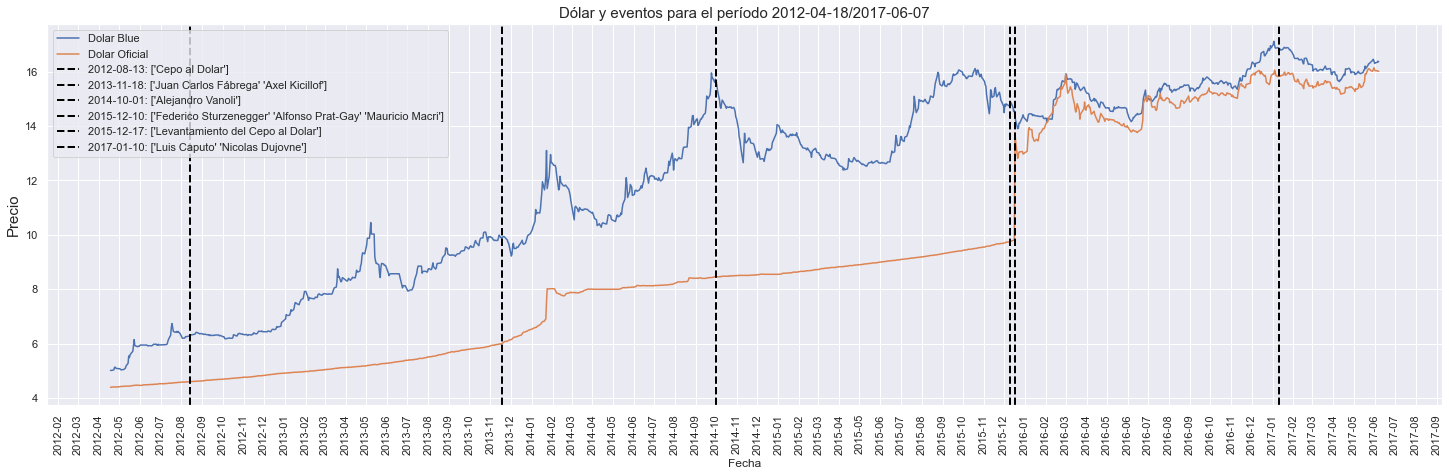

In [16]:
events = event_dict(df3)
plot_events(df3,events)

Evento destacado: Levantamiento del cepo cambiario y subida abrupta del dólar oficial (2015-12-17).

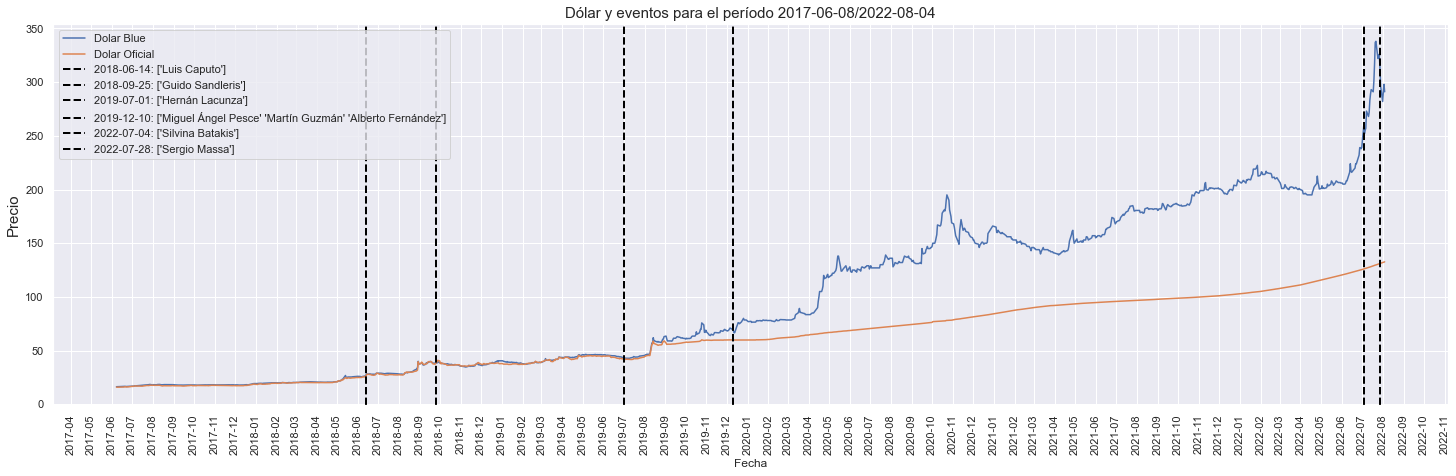

In [17]:
events = event_dict(df4)
plot_events(df4,events)

Eventos destacados: Asunción del Alberto Fernández(2019-12-10), y mas recientemente la renuncia del ministro de economía Martín Guzmán(2022-07-04), que generó una fuerte corrida alcista en el precio del dólar blue.

## 3) Predicción del valor del dólar blue y dólar oficial mediante regresión linear: 

In [18]:
predecir = [3,6,12]
for i in predecir:
    print(prediccion_linear_dolar(usd_full_new,'blue',i))

La predicción del precio del dolar blue, para la fecha 2022-11-05 es de: 243.75 pesos.
La predicción del precio del dolar blue, para la fecha 2023-02-05 es de: 256.91 pesos.
La predicción del precio del dolar blue, para la fecha 2023-08-05 es de: 282.79 pesos.


In [20]:
for i in predecir:
    print(prediccion_linear_dolar(usd_full_new,'oficial', i))


La predicción del precio del dolar oficial, para la fecha 2022-11-05 es de: 126.07 pesos.
La predicción del precio del dolar oficial, para la fecha 2023-02-05 es de: 131.84 pesos.
La predicción del precio del dolar oficial, para la fecha 2023-08-05 es de: 143.19 pesos.


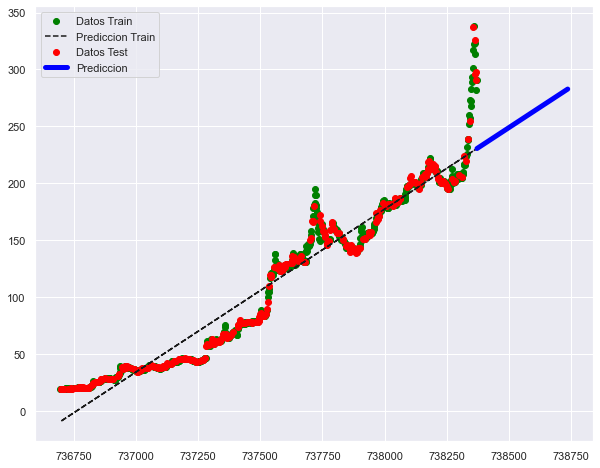

In [22]:
prediccion_linear_dolar(usd_full_new,'blue',12,plot=True)

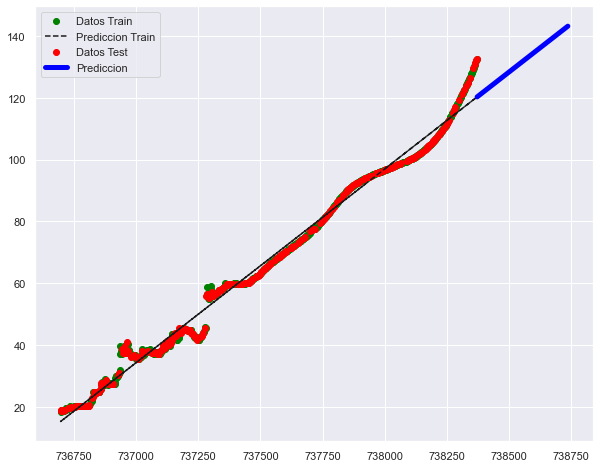

In [21]:
prediccion_linear_dolar(usd_full_new,'oficial',12,plot=True)

## 4) Inlación vs Dólar

<AxesSubplot:xlabel='fecha'>

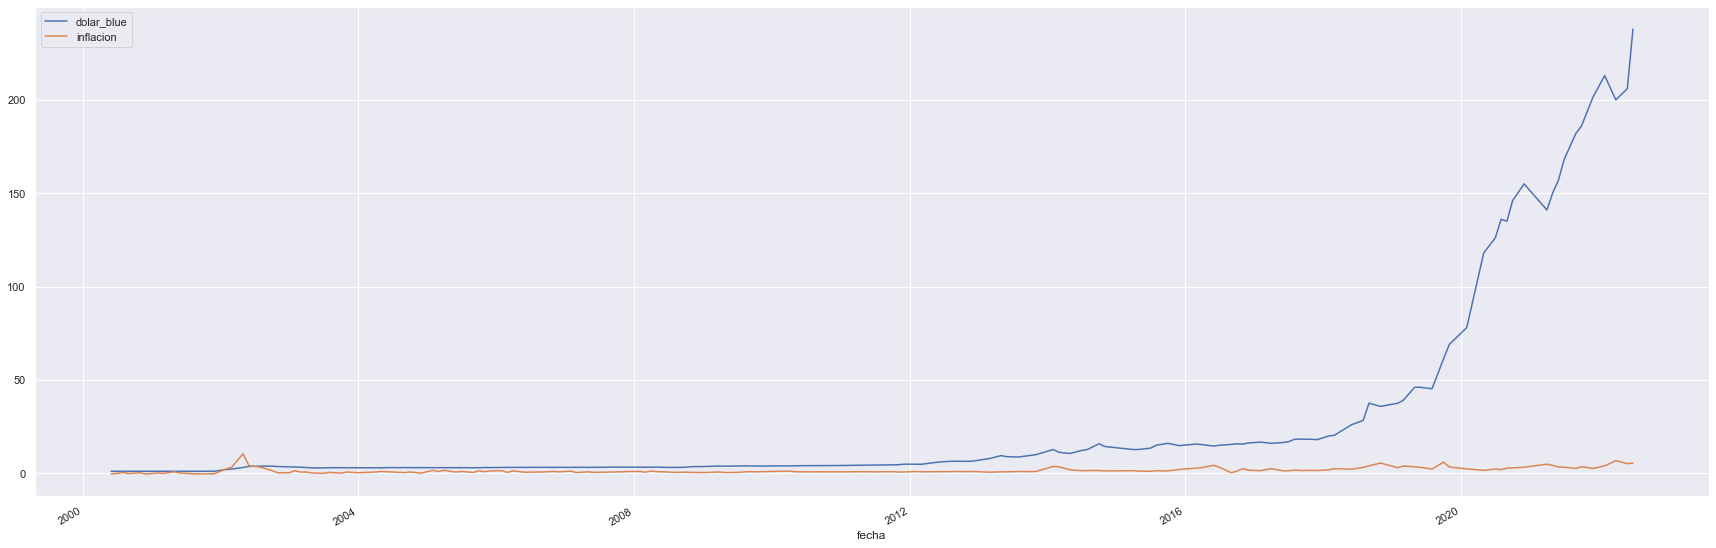

In [24]:
inflacion = get_inflacion()
usd_inf = pd.merge(usd, inflacion, on='fecha')
usd_inf.plot(x = 'fecha')

In [45]:
  
usd_inf['inflacion_acumulada'] = usd_inf['inflacion'].cumsum(axis = 0, skipna = False) 

<AxesSubplot:xlabel='fecha'>

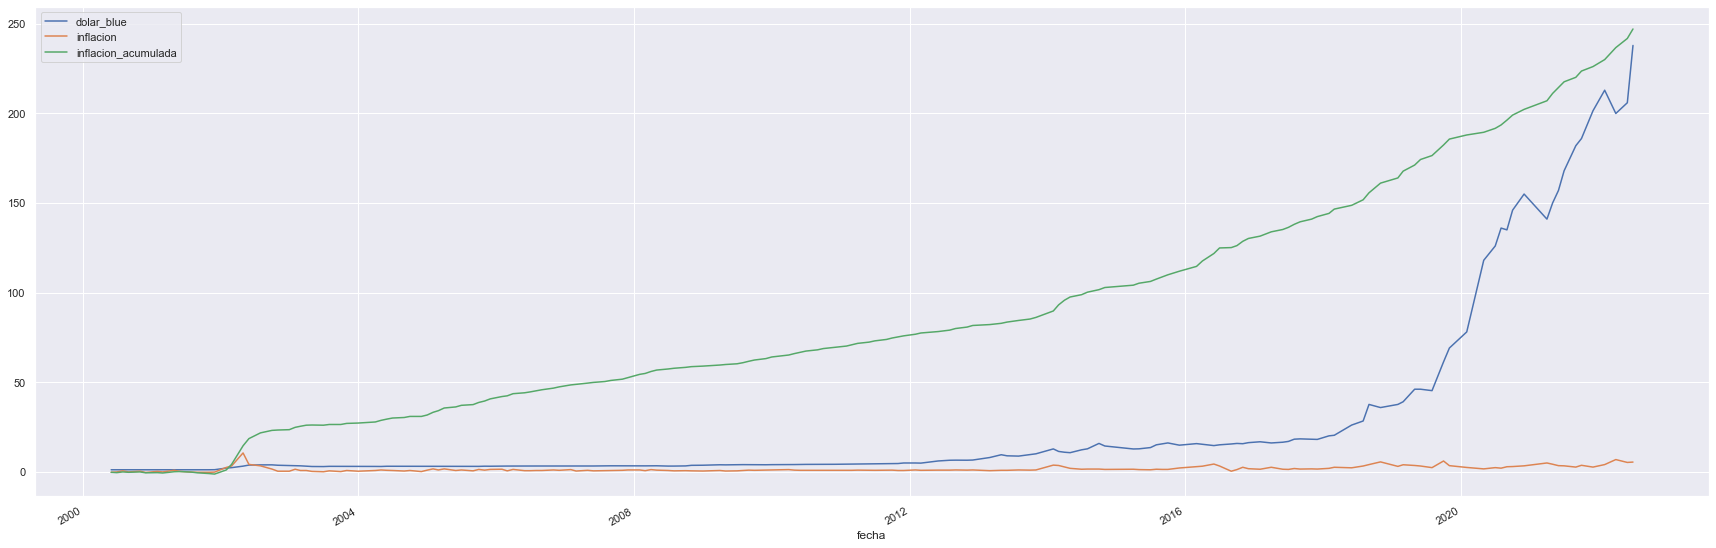

In [46]:
usd_inf.plot(x='fecha') #Intenté hacer un gráfico mas representativo de inflación vs dólar pero no logré obtener conclusiones significativas

In [47]:
usd_inf

,fecha,dolar_blue,inflacion,inflacion_acumulada
0,2000-05-31,1.0010,-0.4,-0.4
1,2000-06-30,0.9985,-0.2,-0.6
2,2000-07-31,0.9991,0.4,-0.2
3,2000-08-31,0.9987,-0.2,-0.4
4,2000-10-31,1.0000,0.2,-0.2
...,...,...,...,...
169,2021-11-30,201.5000,2.5,226.2
170,2022-01-31,213.0000,3.9,230.1
171,2022-03-31,200.0000,6.7,236.8
172,2022-05-31,206.0000,5.1,241.9


### Mejor momento para comprar dólar oficial y venderlo a dólar blue

In [ ]:
max_var = usd_full['variacion_brecha'].nlargest(1)
usd_full.loc[max_var.index[0]]

fecha                     2022-07-22 00:00:00
dolar_blue                              338.0
dolar_oficial                          129.76
variacion_brecha                     160.4809
porcentaje_volatilidad                   0.12
semana                                     29
dia                                    Friday
Name: 5000, dtype: object

El mejor momento para comprar dólar oficial y venderlo al blue (teniendo en cuenta el márgen de diferencia diario), fue el día viernes 22 de Julio del corriente año.